In [1]:
import json
from pprint import pprint

twdata = json.load(open('shutdown.json'))
twtexts = []
twnames = []

for tw in twdata:
    twtexts.append(tw['text'])
    if 'retweeted_status' in tw:
        twnames.append(tw['retweeted_status']['user']['screen_name'])

print("Length of tweets: " + str(len(twtexts)) )

#Q1: Load all tweets, and retweet usernames. What are the top 5 most popular retweet usernames? 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import numpy as np
count = CountVectorizer(binary = True, min_df = 20, stop_words='english')
X = count.fit_transform(twnames)

vocab = np.array(count.get_feature_names())
freq = X.sum(0).A1
order = freq.argsort()[::-1]
print("Q1: %s" % vocab[order[:5]])

Length of tweets: 5000
Q1: ['foxnews' 'sendougjones' 'peterdaou' 'thedailyedge' 'banditrandom']


In [2]:
#Q2: Remove duplicate tweets. How many tweets are remained? (Use only unique tweets for the next questions). 
uniquetw = list(set(twtexts))
print("Q2: Length of unique tweets: " + str(len(uniquetw)) )
print("Total # of duplicate tweets: " + str(len(twtexts)-len(uniquetw)) )


Q2: Length of unique tweets: 919
Total # of duplicate tweets: 4081


In [3]:
#Q3: Remove URLs and mentions and rename hashtag sign to ‘hashtag_’. Vectorize tweets using binary vectorization. 
#What are top 5 popular hashtags? 
import re
protw =[]
hashtags =[]

regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

for tw in uniquetw:
    #removing URLs
    temp = pattern_url.sub('', tw)
    #Removing mentions
    temp = pattern_mention.sub('', temp)
    #Chaning hashtag sign (#) to 'hashtag_'
    temp = pattern_hashtag.sub(r'hashtag_\1', temp)
    #print(temp)
    protw.append(temp)
    atweethashtag= re.findall('hashtag_([A-Za-z]+[A-Za-z0-9]+)', temp)
    if (atweethashtag) != []:
        hashtags.append(" ".join(atweethashtag))

#Binary victorization of processed tweets
Binary = CountVectorizer(binary = True)
X = Binary.fit_transform(protw)

#print(hashtags)
count = CountVectorizer(binary = True, min_df = 10, stop_words='english')
X2 = count.fit_transform(hashtags)
vocab = np.array(count.get_feature_names())
freq = X2.sum(0).A1
order = freq.argsort()[::-1]
print("Q3: %s" % vocab[order[:5]])

Q3: ['shutdown' 'trumpshutdown' 'trump' 'schumershutdown' 'shutdown2018']


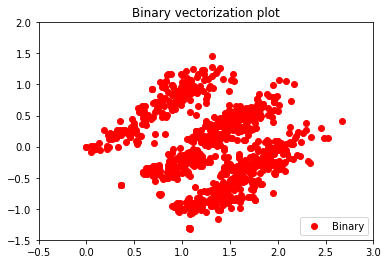

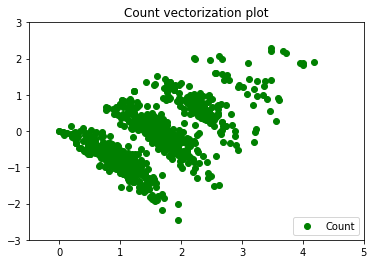

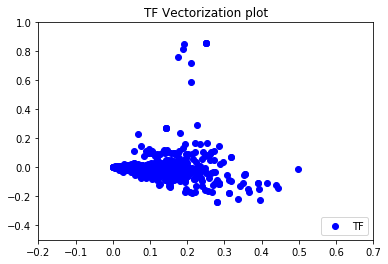

In [4]:
#Q4: Map document to term matrix to 2D space and plot it using binary vectorization. 
#Repeat that for count vectorization and TF-IDF vectorization. Analyze your result. 
#Binary victorization of processed tweets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from  sklearn.decomposition import TruncatedSVD

Binary = CountVectorizer(binary = True)
Xbinary = Binary.fit_transform(protw)
Blsa = TruncatedSVD(2)
BX_2d = Blsa.fit_transform(Xbinary)

colors = 'bgry'
plt.scatter(BX_2d[:,0], BX_2d[:,1], c = colors[2], label = "Binary")
plt.title('Binary vectorization plot')
plt.xlim(-.5, 3)
plt.ylim(-1.5, 2)
plt.legend(loc = 'lower right')
plt.show()

#count vectorization
Count = CountVectorizer()
Xcount = Count.fit_transform(protw)
Clsa = TruncatedSVD(2)
CX_2d = Clsa.fit_transform(Xcount)

plt.scatter(CX_2d[:,0], CX_2d[:,1], c = colors[1], label = "Count")
plt.title('Count vectorization plot')
plt.xlim(-.5, 5)
plt.ylim(-3, 3)
plt.legend(loc = 'lower right')
plt.show()

 #TF vectorization
TfIdf = TfidfVectorizer(binary = True, min_df = 1, stop_words='english')
TfX = TfIdf.fit_transform(protw)
Tflsa = TruncatedSVD(2)
TfX_2d = Tflsa.fit_transform(TfX)

plt.scatter(TfX_2d[:,0], TfX_2d[:,1], c = colors[0], label = "TF")
plt.title('TF Vectorization plot')
plt.xlim(-.2, .7)
plt.ylim(-.5, 1)
plt.legend(loc = 'lower right')
plt.show()


In [5]:
#Q5: Co-occurrence analysis: Find which two hashtags appear together in a same tweet mostly? 
#Which two are the second most? Analyze your results. 
import numpy as np

Binary = CountVectorizer(binary = True)
Xbinary = Binary.fit_transform(hashtags)
cooc = Xbinary.T.dot(Xbinary).toarray()

np.fill_diagonal(cooc, 0)
i1,j1 = np.unravel_index(cooc.argmax(), cooc.shape)
vocab = np.array(Binary.get_feature_names())
#print("Q5: Two hashtags most appeared together %s %s" % str(vocab[i1]), str(vocab[j1])
print("Q5: Two hashtags most appeared together: " + vocab[i1], vocab[j1])
cooc[i1, j1] = 0
cooc[j1, i1] = 0

i2,j2 = np.unravel_index(cooc.argmax(), cooc.shape)
print("Two hashtags next most appeared together: " + vocab[i2], vocab[j2])

Q5: Two hashtags most appeared together: shutdown trumpshutdown
Two hashtags next most appeared together: shutdown trump
